In [1]:
x = 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce

# Second assigment
In the following we describe the assigment that will be solved in the notebook.

Consider a random variable X with values in:

$$ A_X = \big \{ x_1, . . ., x_8 \big \} $$

and probability mass function

$$PX = \bigg \{ \dfrac{1}{4},\dfrac{1}{4},\dfrac{1}{4},\dfrac{3}{16},\dfrac{1}{64},\dfrac{1}{64},\dfrac{1}{64}, \dfrac{1}{64} \bigg \}$$

We wanna solve:

* What is the information content of each outcome $x_i$?

* What is the entropy of the distribution?

* Draw a binary probability tree for X. For each node, write the corresponding envent; 
for each edge, write the corresponding conditional probability
* Plot the essential bit content $H_{\delta}(X)$ as a function of the error $\delta$

In [3]:
# Dictionary mapping each outcome to its probability
outcomes_prob_dict = {'x1': 1/4, 'x2': 1/4, 'x3': 1/4, 'x4': 3/16, 'x5': 1/64, 'x6': 1/64, 'x7': 1/64, 'x8': 1/64}

# Dictionary mapping each outcome to its entropy
outcomes_entroppy_dict = {outcome : -np.log2(outcomes_prob_dict[outcome]) for outcome in outcomes_prob_dict}

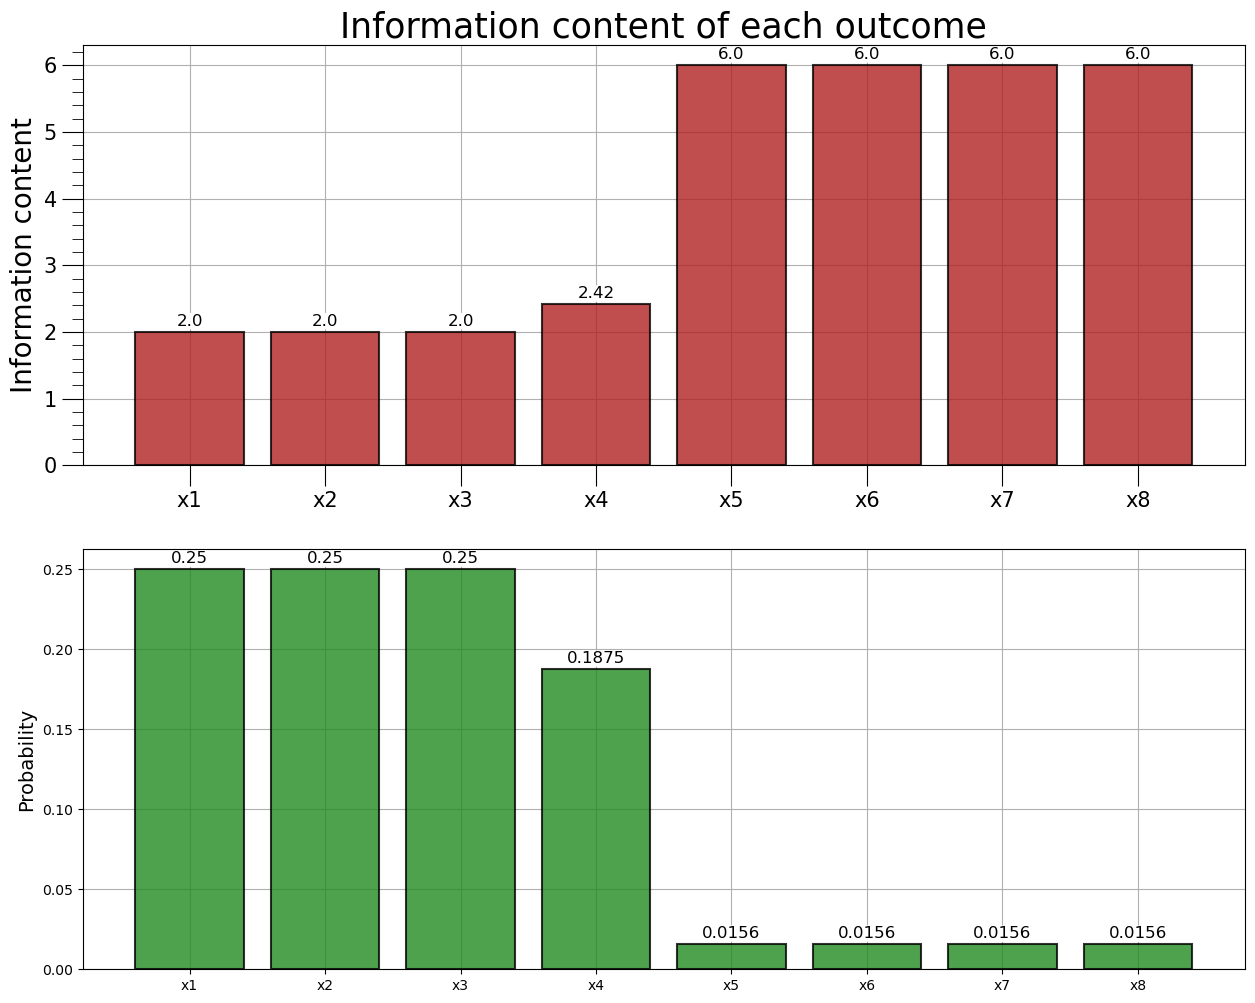

In [9]:
# Plotting the information content of each outcome

fig, ax_ = plt.subplots(2, 1, figsize = (15, 12))

ax, ax1 = ax_

ax.bar(outcomes_entroppy_dict.keys(), outcomes_entroppy_dict.values(), color = 'firebrick', alpha = 0.8, edgecolor = 'black', linewidth = 1.5,\
    zorder = 2)

for outcome in outcomes_entroppy_dict:
    ax.text(outcome, outcomes_entroppy_dict[outcome] + 0.05, str(round(outcomes_entroppy_dict[outcome], 2)), ha = 'center', va = 'bottom', fontsize = 12,\
         zorder =2, bbox=dict(facecolor='white', edgecolor= 'white', boxstyle='round, pad=0'))

ax1.bar(outcomes_prob_dict.keys(), outcomes_prob_dict.values(), color = 'forestgreen', alpha = 0.8, \
          edgecolor = 'black', linewidth = 1.5, zorder = 2)

for outcome in outcomes_prob_dict:
    ax1.text(outcome, outcomes_prob_dict[outcome] + 0.002, str(round(outcomes_prob_dict[outcome], 4)), ha = 'center', va = 'bottom', fontsize = 12,\
         zorder =2, bbox=dict(facecolor='white', edgecolor= 'white', boxstyle='round, pad=0'))

ax1.grid()
ax1.set_ylabel('Probability', fontsize = 14)

ax.grid(zorder = 1)
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=15, length=15)
ax.tick_params(axis='y', which='minor', labelsize=15, length=8)
ax.tick_params(axis='x', which='minor', labelsize=15, length=0)
ax.set_ylabel('Information content', fontsize = 20)
ax.set_title('Information content of each outcome', fontsize = 25)
plt.show()


In [24]:
print(f'The entropy of the distribution is:  {np.sum([outcomes_prob_dict[outcome] * outcomes_entroppy_dict[outcome] for outcome in outcomes_prob_dict]):.2f}')

The entropy of the distribution is:  2.33


In [25]:
reversed_prob = dict(reversed(outcomes_prob_dict.items()))

In [26]:
cum_dict = {list(reversed_prob.keys())[i]: np.cumsum(list(reversed_prob.values()))[i] for i in range(len(reversed_prob))}

In [27]:
cum_dict

{'x8': 0.015625,
 'x7': 0.03125,
 'x6': 0.046875,
 'x5': 0.0625,
 'x4': 0.25,
 'x3': 0.5,
 'x2': 0.75,
 'x1': 1.0}

In [28]:
import graphviz

In [29]:
print('''
E1 = x5, x6, x7, x8
E2 = x5, x6
E3 = x1, x2
E4 = x5 
E5 = x7
E6 = x1
''')


E1 = x5, x6, x7, x8
E2 = x5, x6
E3 = x1, x2
E4 = x5 
E5 = x7
E6 = x1



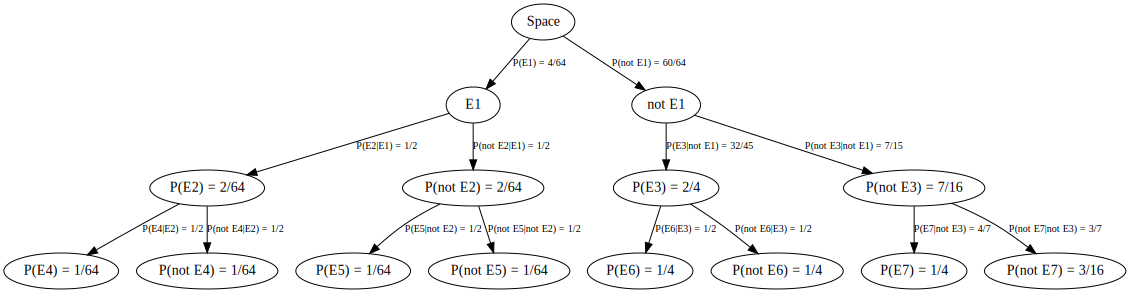

In [30]:
from graphviz import Digraph
outcomes_prob_dict = {'x1': 1/4, 'x2': 1/4, 'x3': 1/4, 'x4': 3/16, 'x5': 1/64, 'x6': 1/64, 'x7': 1/64, 'x8': 1/64}
# Create Digraph object
dot = Digraph()

# Add nodes 1 and 2
dot.node('1', label = 'Space')
dot.node('2', label = 'E1')
dot.node('3', label = 'not E1')
dot.node('4', label = 'P(E2) = 2/64')
dot.node('5', label = 'P(not E2) = 2/64')
dot.node('6', label = 'P(E3) = 2/4')
dot.node('7', label = 'P(not E3) = 7/16')
dot.node('8', label = 'P(E4) = 1/64')
dot.node('9', label = 'P(not E4) = 1/64')
dot.node('10', label = 'P(E5) = 1/64')
dot.node('11', label = 'P(not E5) = 1/64')
dot.node('12', label = 'P(E6) = 1/4')
dot.node('13', label = 'P(not E6) = 1/4')
dot.node('14', label = 'P(E7) = 1/4')
dot.node('15', label = 'P(not E7) = 3/16')

# Add edge between 1 and 2
dot.edge('1', '2', label = 'P(E1) = 4/64', fontsize = '10', labelfloat = 'false')
dot.edge('1', '3', label = 'P(not E1) = 60/64', fontsize = '10')
dot.edge('2', '4', label = 'P(E2|E1) = 1/2', fontsize = '10')
dot.edge('2', '5', label = 'P(not E2|E1) = 1/2', fontsize = '10')
dot.edge('3', '6', label = 'P(E3|not E1) = 32/45', fontsize = '10')
dot.edge('3', '7', label = 'P(not E3|not E1) = 7/15', fontsize = '10')
dot.edge('4', '8', label = 'P(E4|E2) = 1/2', fontsize = '10')
dot.edge('4', '9', label = 'P(not E4|E2) = 1/2', fontsize = '10')
dot.edge('5', '10', label = 'P(E5|not E2) = 1/2', fontsize = '10')
dot.edge('5', '11', label = 'P(not E5|not E2) = 1/2', fontsize = '10')
dot.edge('6', '12', label = 'P(E6|E3) = 1/2', fontsize = '10')
dot.edge('6', '13', label = 'P(not E6|E3) = 1/2', fontsize = '10')
dot.edge('7', '14', label = 'P(E7|not E3) = 4/7', fontsize = '10')
dot.edge('7', '15', label = 'P(not E7|not E3) = 3/7', fontsize = '10')

# Visualize the graph
dot

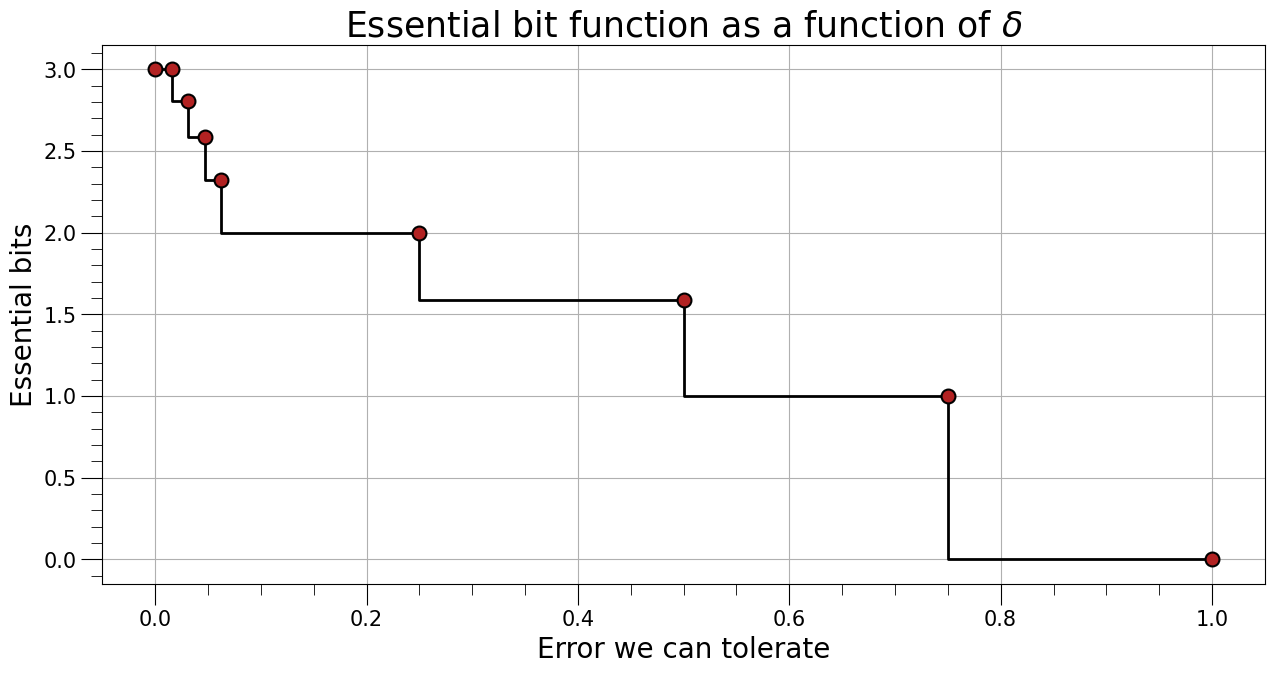

In [50]:
delta_values = list(cum_dict.values())

essential_bit_contents =  [np.log2(8)] + [ np.log2(len(delta_values) - i) for i in range(len(delta_values))]

fig, ax = plt.subplots(1, 1, figsize = (15, 7))

ax.step([0] + delta_values, essential_bit_contents, where = 'pre', color = 'black', linewidth = 2, zorder = 2)
ax.scatter([0] + delta_values, essential_bit_contents,  s = 100, zorder = 2, color = 'firebrick',\
    edgecolor='black', linewidth=1.5)
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=15, length=15)
ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
ax.grid(zorder = 0)
ax.set_xlabel('Error we can tolerate', fontsize = 20)
ax.set_ylabel('Essential bits', fontsize = 20)
ax.set_title('Essential bit function as a function of $\delta$', fontsize = 25)

plt.show()


## Second part

In [68]:
array_prob = np.array(list(outcomes_prob_dict.values()))

In [69]:
x, y, z = np.meshgrid(array_prob, array_prob, array_prob)

In [71]:
all_probabilities = x * y * z

flattened_prob = all_probabilities.flatten()

In [72]:
shannon_all = np.sum([ - prob * np.log2(prob) for prob in flattened_prob])
print(shannon_all)

6.98345859334435


In [73]:
print(flattened_prob.shape)

(512,)


In [82]:
print(1/64)

0.015625


In [47]:
sortened_prob = np.sort(flattened_prob)
deltas_all = np.cumsum(sortened_prob)

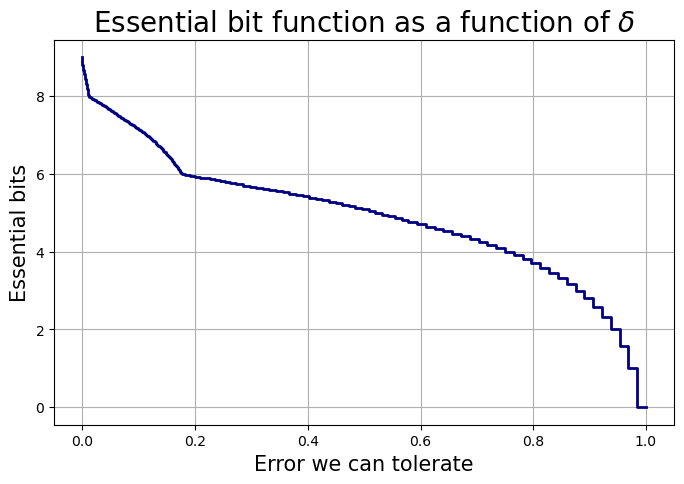

In [54]:
y_axis = [ np.log2(len(deltas_all) - i ) for i in range(len(deltas_all))]
x_axis = deltas_all

fig, ax = plt.subplots(1, 1, figsize = (8, 5))

ax.step(x_axis, y_axis, where = 'pre', color = 'navy', linewidth = 2, zorder = 2)

ax.set_ylabel('Essential bits', fontsize = 15)
ax.set_xlabel('Error we can tolerate', fontsize = 15)
ax.set_title('Essential bit function as a function of $\delta$', fontsize = 20)
ax.grid(zorder = 0)
plt.show()

In [79]:
s_delta_length = len(deltas_all[deltas_all < 1/100])

In [86]:
print('The number of binary strings we need is:', int(np.ceil(np.log2(s_delta_length + 1))))

The number of binary strings we need is: 8
